In [826]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.impute import SimpleImputer 
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [827]:
PATH_DATABASE = "./database/adult"
DATABASE_EXTENSION = ".csv"
TARGET_NAME = "class"

In [828]:
def load_data ():
    return pd.read_csv(PATH_DATABASE + DATABASE_EXTENSION, encoding='latin-1', delimiter=',')

In [829]:
def split_features_target (db):
    return db.drop(TARGET_NAME, axis = 1), db[TARGET_NAME]

In [830]:
def encode_data (db, cols):
    le = LabelEncoder()

    for col in cols:
        db[col] = le.fit_transform(db[col])
    return db

In [831]:
def dummy_data (db, cols):
    return pd.get_dummies(db, columns = cols)

In [832]:
def fill_missingValues (db):
    si = SimpleImputer(strategy='most_frequent')

    db = db.replace('?', np.nan)
    return pd.DataFrame(si.fit_transform(db), columns=db.columns)

In [833]:
def under_sampling (X, y):
    #tl = TomekLinks()
    rus = RandomUnderSampler(random_state=49)
    return rus.fit_resample (X, y)


In [834]:
database = load_data()
database

,age,work-class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [835]:
#database = fill_missingValues(database)

In [836]:
print(len(database))
database.dropna(axis=0, how='any', inplace=True)
database.drop(['fnlwgt','education'], axis=1, inplace=True)
features, target = split_features_target(database)
features

48842


,age,work-class,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


**Distribuicao da base apos remover instacias com atributos faltantes**

45222


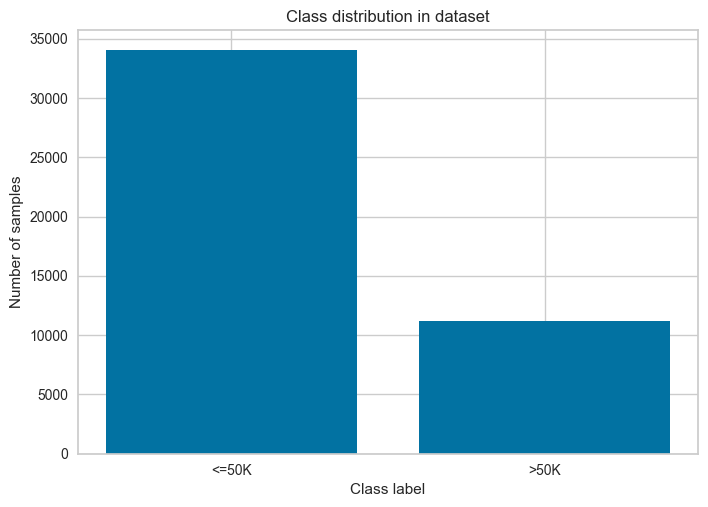

In [837]:
class_labels = target.values
unique_labels, counts = np.unique(class_labels, return_counts=True)
print(len(class_labels))
plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

**Detectando Outliers**

In [838]:
# Calculate z-scores for each numerical column
z_scores = np.abs(zscore(database.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 3

# Create a mask to identify rows with outliers
outlier_mask = np.any(z_scores > threshold, axis=1)

# Filter the DataFrame to exclude rows with outliers
clean_data = database[~outlier_mask]

In [839]:
print(sum(outlier_mask))

3390


**Detectando instâncias redundantes**

In [840]:
# Identify duplicate rows
duplicates = database.duplicated()
print(database[duplicates])
# Remove duplicate rows
database.drop_duplicates(inplace=True)

       age work-class  edu-num      marital-status         occupation  \
352     33    Private       13  Married-civ-spouse    Exec-managerial   
391     27    Private       13       Never-married       Craft-repair   
563     24    Private        9       Never-married  Handlers-cleaners   
570     24    Private        9       Never-married       Craft-repair   
673     33    Private       13  Married-civ-spouse    Exec-managerial   
...    ...        ...      ...                 ...                ...   
48824   22    Private       10       Never-married       Craft-repair   
48830   32    Private        9  Married-civ-spouse  Handlers-cleaners   
48833   31    Private        9  Married-civ-spouse       Craft-repair   
48834   25    Private        9       Never-married      Other-service   
48839   38    Private       13  Married-civ-spouse     Prof-specialty   

        relationship   race     sex  capital-gain  capital-loss  \
352          Husband  White    Male             0       

**Colunas para dummy e encode**

In [841]:
colsToEncode = ['sex']
colsToDummy = ['work-class', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

**Encoding**

In [842]:
features = encode_data(features, colsToEncode)
features = dummy_data(features, colsToDummy)
features

,age,edu-num,sex,capital-gain,capital-loss,hours-pre-week,work-class_Federal-gov,work-class_Local-gov,work-class_Private,work-class_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,1,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,1,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,1,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,1,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,13,1,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48837,39,13,0,0,0,36,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,13,1,0,0,50,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,13,1,5455,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


**Preparando para rodar modelos**

In [843]:
x_prev = features.values
X_train, X_test, y_train, y_test = train_test_split(x_prev, target, test_size=0.2, random_state=0)

In [844]:
X_train, y_train = under_sampling(X_train, y_train)

In [845]:
y_train.value_counts()

class
<=50K    9003
>50K     9003
Name: count, dtype: int64

**K-fold cross-validation**

In [846]:
# model_kf = LogisticRegression()

# # Defining the number of folds (k)
# k = 5

# # Creating the StratifiedKFold object
# skf = StratifiedKFold(n_splits=k)

# # Performing k-fold cross-validation
# fold_scores = []

# for train_index, val_index in skf.split(X_train, y_train):
#     # Obtaining the training and validation data for the current fold
#     X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
#     # Perform under-sampling if needed (assuming you have the 'under_sampling' function)
#     X_train_fold, y_train_fold = under_sampling(X_train_fold, y_train_fold)
    
#     # Fit the model on the training data
#     model_kf.fit(X_train_fold, y_train_fold)
    
#     # Evaluate the model on the validation data
#     fold_score = model_kf.score(X_val_fold, y_val_fold)
#     fold_scores.append(fold_score)

# # Print the accuracy scores for each fold
# for i, score in enumerate(fold_scores):
#     print(f"Fold {i+1}: {score}")

# # Print the mean accuracy score and standard deviation
# mean_score = np.mean(fold_scores)
# std_score = np.std(fold_scores)
# print("Mean Accuracy:", mean_score)
# print("Standard Deviation:", std_score)

**Rodando GRID SEARCH**

In [847]:
# params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 4, 6, 8, 10],
#     'max_features':[None,'sqrt','log2', 0.2, 0.4, 0.6, 0.8, 1],
#     'splitter': ['best', 'random'],
#     'random_state': [0,42],
#     'min_samples_split': [2, 4, 6, 8, 10],
#     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
#     }

In [848]:
# decisionTreeGS = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params,
#     cv=3,
#     n_jobs=5,
#     verbose=1,
# )
# decisionTreeGS.fit(X_train, y_train)
# print(decisionTreeGS.best_params_)
# print(decisionTreeGS.best_score_)

In [849]:
dt_best_params = {}
decisionTree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 0.6, min_samples_split= 8, min_weight_fraction_leaf= 0.0, random_state= 0, splitter= 'best') 

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(decisionTree, X_train, y_train, cv=kfold)

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Calculate the lower and upper bounds of the confidence interval
n = len(scores)
confidence = 0.95
t_value = 1.96  # For a 95% confidence interval with a large enough sample size

lower_bound = mean_score - (t_value * (std_score / np.sqrt(n)))
upper_bound = mean_score + (t_value * (std_score / np.sqrt(n)))

print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)
print("Confidence Interval (95%):", (lower_bound, upper_bound))

decisionTree.fit(X_train, y_train)

Mean Accuracy: 0.8164500699339948
Standard Deviation: 0.004636897116731111
Confidence Interval (95%): (0.8123856504081829, 0.8205144894598068)


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.6,
                       min_samples_split=8, random_state=0)

In [850]:
previsoes = decisionTree.predict(X_test)
previsoes

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

0.8014372581536761

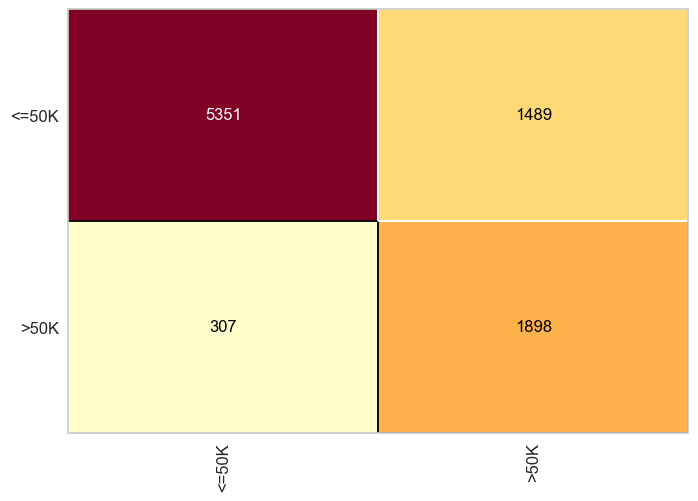

In [851]:
confusion = ConfusionMatrix(decisionTree)
confusion.fit(X_train, y_train)
confusion.score(X_test, y_test)

In [852]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.95      0.78      0.86      6840
        >50K       0.56      0.86      0.68      2205

    accuracy                           0.80      9045
   macro avg       0.75      0.82      0.77      9045
weighted avg       0.85      0.80      0.81      9045



**Naive Bayes**

In [853]:
# params_nb = {
#     'var_smoothing': np.logspace(0,-9, num=100),
# }

# naiveBayesGS = GridSearchCV(
#     estimator=GaussianNB(),
#     param_grid=params_nb,
#     cv=3,
#     n_jobs=5,
#     verbose=1,
# )
# naiveBayesGS.fit(X_train, y_train)
# print(naiveBayesGS.best_params_)
# print(naiveBayesGS.best_score_)

0.7954671088999448

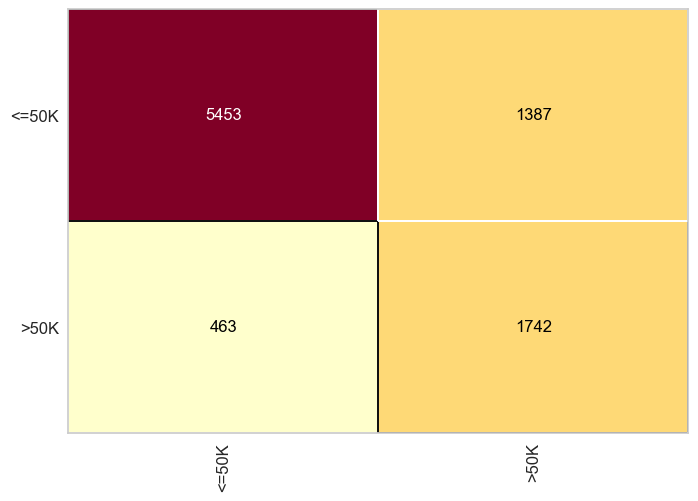

In [854]:
naive_bayes = GaussianNB(var_smoothing = 1e-09)
naive_bayes.fit(X_train, y_train)
previsoes_nb = naive_bayes.predict(X_test)
confusion_nb = ConfusionMatrix(naive_bayes)
confusion_nb.fit(X_train, y_train)
confusion_nb.score(X_test, y_test)

In [855]:
previsoes_nb = naive_bayes.predict(X_test)
print(classification_report(y_test, previsoes_nb))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.85      6840
        >50K       0.56      0.79      0.65      2205

    accuracy                           0.80      9045
   macro avg       0.74      0.79      0.75      9045
weighted avg       0.83      0.80      0.81      9045



In [856]:
# params_rf = {
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [120]
# }

# randomForestGS = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=params_rf,
#     cv=3,
#     n_jobs=5,
#     verbose=1,
# )
# randomForestGS.fit(X_train, y_train)
# print(randomForestGS.best_params_)
# print(randomForestGS.best_score_)

c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

Mean Accuracy: 0.8318896240957191
Standard Deviation: 0.003745338163599128
Confidence Interval (95%): (0.8286066904485666, 0.8351725577428716)


c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8080707573244886

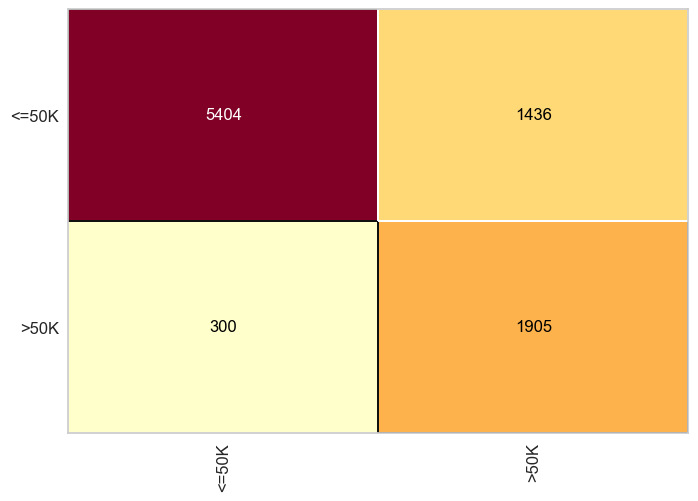

In [857]:
random_forest = RandomForestClassifier(bootstrap= False, max_depth= 30, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 120)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(random_forest, X_train, y_train, cv=kfold)

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Calculate the lower and upper bounds of the confidence interval
n = len(scores)
confidence = 0.95
t_value = 1.96  # For a 95% confidence interval with a large enough sample size

lower_bound = mean_score - (t_value * (std_score / np.sqrt(n)))
upper_bound = mean_score + (t_value * (std_score / np.sqrt(n)))

print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)
print("Confidence Interval (95%):", (lower_bound, upper_bound))

random_forest.fit(X_train, y_train)
previsoes_rf = random_forest.predict(X_test)
confusion_rf = ConfusionMatrix(random_forest)
confusion_rf.fit(X_train, y_train)
confusion_rf.score(X_test, y_test)

In [858]:
previsoes_rf = random_forest.predict(X_test)
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

       <=50K       0.95      0.79      0.86      6840
        >50K       0.57      0.86      0.69      2205

    accuracy                           0.81      9045
   macro avg       0.76      0.83      0.77      9045
weighted avg       0.86      0.81      0.82      9045



**Detectando os atributos mais relevantes**

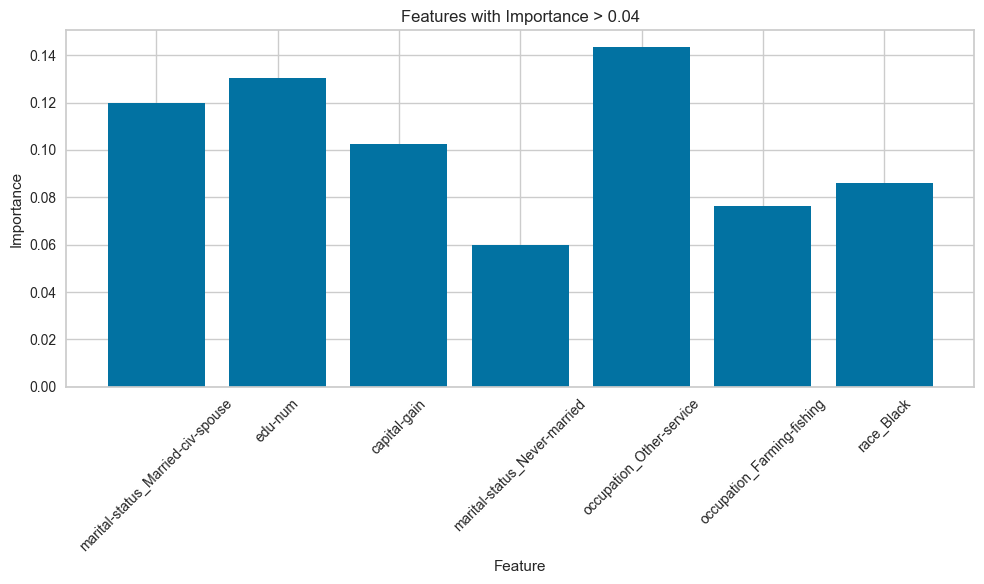

In [859]:
# Get the feature importances
feature_importances = random_forest.feature_importances_

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the column names of the features
feature_names = features.columns[sorted_indices]

# Filter the feature importances based on a threshold
threshold = 0.04
selected_features = feature_names[feature_importances > threshold]

# Plot the selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importances[feature_importances > threshold])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Features with Importance > 0.04')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Rede Neural

**GridSearch da rede neural**

In [860]:
# Create the MLPClassifier
# mlp = MLPClassifier()

# # Define the parameter grid to search over
# param_grid = {
#     'hidden_layer_sizes': [(20,), (10,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive']
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)
# Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
# Best Score: 0.8170064117854855

In [861]:
best_params_nn = {'max_iter' : 1000, 'verbose': True, 'tol': 0.00000000000001, 'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
# max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9
modelo_rn = MLPClassifier(**best_params_nn)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(modelo_rn, X_train, y_train, cv=kfold)

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Calculate the lower and upper bounds of the confidence interval
n = len(scores)
confidence = 0.95
t_value = 1.96  # For a 95% confidence interval with a large enough sample size

lower_bound = mean_score - (t_value * (std_score / np.sqrt(n)))
upper_bound = mean_score + (t_value * (std_score / np.sqrt(n)))

print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)
print("Confidence Interval (95%):", (lower_bound, upper_bound))


Iteration 1, loss = 5.32292425
Iteration 2, loss = 2.40569733
Iteration 3, loss = 0.96576864
Iteration 4, loss = 0.63127410
Iteration 5, loss = 0.57321656
Iteration 6, loss = 0.62148648
Iteration 7, loss = 0.47964205
Iteration 8, loss = 0.44644269
Iteration 9, loss = 0.43684120
Iteration 10, loss = 0.43485507
Iteration 11, loss = 0.43158526
Iteration 12, loss = 0.42805263
Iteration 13, loss = 0.42831980
Iteration 14, loss = 0.41725249
Iteration 15, loss = 0.41910203
Iteration 16, loss = 0.42337442
Iteration 17, loss = 0.56462382
Iteration 18, loss = 0.45842576
Iteration 19, loss = 0.41633893
Iteration 20, loss = 0.40989719
Iteration 21, loss = 0.41024347
Iteration 22, loss = 0.40732496
Iteration 23, loss = 0.41306580
Iteration 24, loss = 0.40794148
Iteration 25, loss = 0.40443828
Iteration 26, loss = 0.40250465
Iteration 27, loss = 0.40269664
Iteration 28, loss = 0.40085920
Iteration 29, loss = 0.40800754
Iteration 30, loss = 0.40188273
Iteration 31, loss = 0.40009062
Iteration 32, los

Iteration 1, loss = 1.43121146
Iteration 2, loss = 0.65600382
Iteration 3, loss = 0.60543833
Iteration 4, loss = 0.57859523
Iteration 5, loss = 0.54584803
Iteration 6, loss = 0.51681825
Iteration 7, loss = 0.48391847
Iteration 8, loss = 0.47405319
Iteration 9, loss = 0.46141712
Iteration 10, loss = 0.44358664
Iteration 11, loss = 0.44669753
Iteration 12, loss = 0.43830881
Iteration 13, loss = 0.43940302
Iteration 14, loss = 0.42832912
Iteration 15, loss = 0.45335958
Iteration 16, loss = 0.41835909
Iteration 17, loss = 0.42442958
Iteration 18, loss = 0.43996950
Iteration 19, loss = 0.54680446
Iteration 20, loss = 0.42036591
Iteration 21, loss = 0.41680974
Iteration 22, loss = 0.41001688
Iteration 23, loss = 0.41225397
Iteration 24, loss = 0.40536672
Iteration 25, loss = 0.40342322
Iteration 26, loss = 0.40212451
Iteration 27, loss = 0.44272881
Iteration 28, loss = 0.40336538
Iteration 29, loss = 0.40373415
Iteration 30, loss = 0.40115256
Iteration 31, loss = 0.39984240
Iteration 32, los

0.7749032614704257

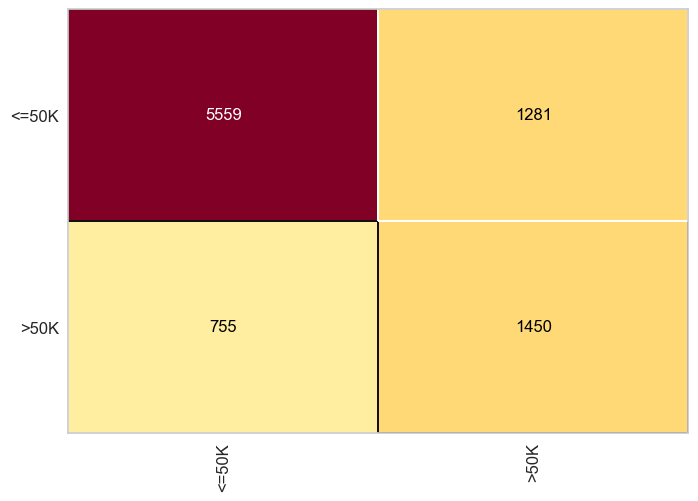

In [862]:
modelo_rn.fit(X_train, y_train)
previsoes_rn = modelo_rn.predict(X_test)
confusion_rn = ConfusionMatrix(modelo_rn)
confusion_rn.fit(X_train, y_train)
confusion_rn.score(X_test, y_test)

In [863]:
print(classification_report(y_test, previsoes_rn))

              precision    recall  f1-score   support

       <=50K       0.88      0.81      0.85      6840
        >50K       0.53      0.66      0.59      2205

    accuracy                           0.77      9045
   macro avg       0.71      0.74      0.72      9045
weighted avg       0.80      0.77      0.78      9045

